# Predicting Nashville Housing Land Use
This project is to create a prediction model for a real estate client of Nashville housing to predict the land use based on certain key features specified by prospective residents.
Refer to documentation for further details.

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import warnings
warnings.filterwarnings("ignore")

In [2]:
#loading dataset
df = pd.read_csv('Nashville Housing.csv')
df.head(5)

,UniqueID,ParcelID,LandUse,PropertyAddress,SaleDate,Sale Price,LegalReference,SoldAsVacant,OwnerName,OwnerAddress,Acreage,TaxDistrict,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath
0,2045,007 00 0 125.00,SINGLE FAMILY,"1808 FOX CHASE DR, GOODLETTSVILLE",9-Apr-13,240000,20130412-0036474,No,"FRAZIER, CYRENTHA LYNETTE","1808 FOX CHASE DR, GOODLETTSVILLE, TN",2.3,GENERAL SERVICES DISTRICT,50000.0,168200.0,235700.0,1986.0,3.0,3.0,0.0
1,16918,007 00 0 130.00,SINGLE FAMILY,"1832 FOX CHASE DR, GOODLETTSVILLE",10-Jun-14,366000,20140619-0053768,No,"BONER, CHARLES & LESLIE","1832 FOX CHASE DR, GOODLETTSVILLE, TN",3.5,GENERAL SERVICES DISTRICT,50000.0,264100.0,319000.0,1998.0,3.0,3.0,2.0
2,54582,007 00 0 138.00,SINGLE FAMILY,"1864 FOX CHASE DR, GOODLETTSVILLE",26-Sep-16,435000,20160927-0101718,No,"WILSON, JAMES E. & JOANNE","1864 FOX CHASE DR, GOODLETTSVILLE, TN",2.9,GENERAL SERVICES DISTRICT,50000.0,216200.0,298000.0,1987.0,4.0,3.0,0.0
3,43070,007 00 0 143.00,SINGLE FAMILY,"1853 FOX CHASE DR, GOODLETTSVILLE",29-Jan-16,255000,20160129-0008913,No,"BAKER, JAY K. & SUSAN E.","1853 FOX CHASE DR, GOODLETTSVILLE, TN",2.6,GENERAL SERVICES DISTRICT,50000.0,147300.0,197300.0,1985.0,3.0,3.0,0.0
4,22714,007 00 0 149.00,SINGLE FAMILY,"1829 FOX CHASE DR, GOODLETTSVILLE",10-Oct-14,278000,20141015-0095255,No,"POST, CHRISTOPHER M. & SAMANTHA C.","1829 FOX CHASE DR, GOODLETTSVILLE, TN",2.0,GENERAL SERVICES DISTRICT,50000.0,152300.0,202300.0,1984.0,4.0,3.0,0.0


# Exploratory Analysis


#### Inspecting Data

In [3]:
#how many rows and columns has our dataset
df.shape

(56477, 19)

In [4]:
df.describe()

,UniqueID,Acreage,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath
count,56477.000000,26015.000000,2.601500e+04,2.601500e+04,2.601500e+04,24163.000000,24157.000000,24275.000000,24144.000000
mean,28334.001133,0.498923,6.906856e+04,1.607847e+05,2.323754e+05,1963.744899,3.089912,1.886014,0.283921
std,16352.590651,1.570454,1.060401e+05,2.067999e+05,2.810643e+05,26.542982,0.852869,0.961515,0.487881
min,0.000000,0.010000,1.000000e+02,0.000000e+00,1.000000e+02,1799.000000,0.000000,0.000000,0.000000
25%,14186.000000,0.180000,2.100000e+04,7.590000e+04,1.028000e+05,1948.000000,3.000000,1.000000,0.000000
50%,28313.000000,0.270000,2.880000e+04,1.114000e+05,1.485000e+05,1960.000000,3.000000,2.000000,0.000000
75%,42513.000000,0.450000,6.000000e+04,1.807000e+05,2.683500e+05,1983.000000,3.000000,2.000000,1.000000
max,56635.000000,160.060000,2.772000e+06,1.297180e+07,1.394040e+07,2017.000000,11.000000,10.000000,3.000000


In [5]:
df['Bedrooms'].value_counts()

3.0     12877
2.0      5104
4.0      4856
5.0       870
6.0       243
1.0       102
0.0        43
7.0        35
8.0        22
9.0         2
10.0        2
11.0        1
Name: Bedrooms, dtype: int64

In [6]:
df['LandUse'].value_counts()

SINGLE FAMILY                                 34197
RESIDENTIAL CONDO                             14080
VACANT RESIDENTIAL LAND                        3547
VACANT RES LAND                                1549
DUPLEX                                         1373
ZERO LOT LINE                                  1048
CONDO                                           247
RESIDENTIAL COMBO/MISC                           95
TRIPLEX                                          92
QUADPLEX                                         39
CONDOMINIUM OFC  OR OTHER COM CONDO              35
CHURCH                                           34
MOBILE HOME                                      20
DORMITORY/BOARDING HOUSE                         19
SPLIT CLASS                                      17
VACANT COMMERCIAL LAND                           17
PARKING LOT                                      11
GREENBELT                                        10
FOREST                                           10
PARSONAGE   

In [7]:
#checking for more info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56477 entries, 0 to 56476
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   UniqueID         56477 non-null  int64  
 1   ParcelID         56477 non-null  object 
 2   LandUse          56477 non-null  object 
 3   PropertyAddress  56448 non-null  object 
 4   SaleDate         56477 non-null  object 
 5   Sale Price       56477 non-null  object 
 6   LegalReference   56477 non-null  object 
 7   SoldAsVacant     56477 non-null  object 
 8   OwnerName        25261 non-null  object 
 9   OwnerAddress     26015 non-null  object 
 10  Acreage          26015 non-null  float64
 11  TaxDistrict      26015 non-null  object 
 12  LandValue        26015 non-null  float64
 13  BuildingValue    26015 non-null  float64
 14  TotalValue       26015 non-null  float64
 15  YearBuilt        24163 non-null  float64
 16  Bedrooms         24157 non-null  float64
 17  FullBath    

In [8]:
#using a threshold of 5%, if missing values < threshold, drop
threshold = len(df)* 0.05
threshold

2823.8500000000004

In [9]:
#checking for nulls
df.isnull().sum()

UniqueID               0
ParcelID               0
LandUse                0
PropertyAddress       29
SaleDate               0
Sale Price             0
LegalReference         0
SoldAsVacant           0
OwnerName          31216
OwnerAddress       30462
Acreage            30462
TaxDistrict        30462
LandValue          30462
BuildingValue      30462
TotalValue         30462
YearBuilt          32314
Bedrooms           32320
FullBath           32202
HalfBath           32333
dtype: int64

In [10]:
#checking for duplicates
df.duplicated().unique()   #no duplicates

array([False])

The null values exceed the threshold hence cannot drop, fill nulls.

In [11]:
#checking Building values
df['BuildingValue'].value_counts()

0.0         1852
88000.0       37
70000.0       35
86300.0       34
98900.0       33
            ... 
500600.0       1
502200.0       1
511700.0       1
724700.0       1
519900.0       1
Name: BuildingValue, Length: 4405, dtype: int64

In [12]:
#checking acreage values
df['Acreage'].value_counts()

0.17      1859
0.18      1194
0.20      1019
0.23       955
0.22       822
          ... 
2.66         1
5.72         1
5.70         1
6.10         1
160.06       1
Name: Acreage, Length: 519, dtype: int64

In [13]:
#checking values for TotalValue
df['TotalValue'].value_counts()

11000.0      173
25000.0       93
40000.0       83
13000.0       79
20000.0       73
            ... 
257800.0       1
342300.0       1
343100.0       1
339500.0       1
1921700.0      1
Name: TotalValue, Length: 5848, dtype: int64

In [14]:
# #checking values for landvalue
df['LandValue'].value_counts()

25000.0      1533
26000.0      1038
27000.0       887
30000.0       849
18000.0       812
             ... 
201200.0        1
196900.0        1
183200.0        1
24100.0         1
1921700.0       1
Name: LandValue, Length: 1122, dtype: int64

In [15]:
#checking year in which the buildings were built
df['YearBuilt'].unique()

array([1986., 1998., 1987., 1985., 1984., 1980., 1976., 1978., 2000.,
       1995.,   nan, 2006., 1974., 1997., 1989., 1988., 1982., 1983.,
       1979., 1973., 1964., 1967., 1972., 1996., 1993., 1959., 1948.,
       2014., 1968., 1969., 1966., 1960., 1961., 1962., 1965., 1957.,
       2015., 1977., 1970., 1991., 1930., 1971., 1953., 1943., 1945.,
       1935., 1938., 1950., 1954., 1963., 1958., 2008., 1955., 1956.,
       1992., 1952., 2004., 2003., 1933., 1975., 1899., 1941., 1990.,
       1946., 1940., 2016., 1951., 1981., 1994., 2005., 1999., 2001.,
       2002., 1939., 1900., 2013., 1880., 1947., 1918., 1920., 1925.,
       1917., 1937., 1926., 1931., 2011., 2007., 2009., 1934., 1936.,
       1928., 1929., 1927., 1932., 1924., 1923., 1949., 1944., 2012.,
       2010., 1942., 1910., 1915., 1903., 1919., 1890., 1922., 1908.,
       1912., 1921., 1907., 1909., 1799., 1911., 1904., 1906., 1893.,
       1905., 1870., 1916., 1902., 1894., 1901., 1832., 2017., 1914.,
       1913.])

### Data Preprocessing

In [16]:
#converting sales price to float
df['SalePrice'] = pd.to_numeric(df['Sale Price'], errors='coerce')
df['SalePrice']

0        240000.0
1        366000.0
2        435000.0
3        255000.0
4        278000.0
           ...   
56472    157500.0
56473    145000.0
56474    234611.0
56475     93844.0
56476     93844.0
Name: SalePrice, Length: 56477, dtype: float64

In [17]:
#using median to fill nulls for LandValue
median_LandValue = df['LandValue'].median()
median_LandValue

28800.0

In [18]:
#Since acreage is a continuous column, I choose mode to fill nulls
median_Acreage = df.Acreage.median()
median_Acreage

0.27

In [19]:
#computing median for Building Values
median_BuildingValue = df['BuildingValue'].median()
median_BuildingValue

111400.0

It's surprising that Buildings value had value zero dollars and had the highest value counts. Refer to data collection

In [20]:
#computing median
median_TotalValue = df['TotalValue'].median()

In [21]:
#since it's about the year in which the building was built, mode will be the best option
YearBuilt = df['YearBuilt'].mode()

In [22]:
median_Bedrooms = df['Bedrooms'].median()
median_Bedrooms

3.0

In [23]:
#computing median to fill in nulls
median_FullBath = df['FullBath'].median()
median_HalfBath = df['HalfBath'].median()
median_SalePrice = df['SalePrice'].median()

In [24]:
#imputing values for columns with null values
df.Acreage = df.Acreage.fillna(median_Acreage)

In [25]:
df.LandValue = df['LandValue'].fillna(median_LandValue)

In [26]:
df.BuildingValue = df['BuildingValue'].fillna(median_BuildingValue)

In [27]:
df.TotalValue = df['TotalValue'].fillna(median_TotalValue)
df.SalePrice = df['SalePrice'].fillna(median_SalePrice)

In [28]:
df.YearBuilt = df['YearBuilt'].fillna(YearBuilt)

In [29]:
df.Bedrooms = df.Bedrooms.fillna(median_Bedrooms)

In [30]:
df.FullBath = df['FullBath'].fillna(median_FullBath)

In [31]:
df.HalfBath = df['HalfBath'].fillna(median_HalfBath)

In [32]:
#checking if null values has been imputed with values
df.isna().sum()

UniqueID               0
ParcelID               0
LandUse                0
PropertyAddress       29
SaleDate               0
Sale Price             0
LegalReference         0
SoldAsVacant           0
OwnerName          31216
OwnerAddress       30462
Acreage                0
TaxDistrict        30462
LandValue              0
BuildingValue          0
TotalValue             0
YearBuilt          32314
Bedrooms               0
FullBath               0
HalfBath               0
SalePrice              0
dtype: int64

In [33]:
df['Bedrooms'] = df['Bedrooms'].astype(int)
df['Bedrooms']

0        3
1        3
2        4
3        3
4        4
        ..
56472    3
56473    3
56474    3
56475    3
56476    3
Name: Bedrooms, Length: 56477, dtype: int32

In [34]:
#checking info if dtypes have changed
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56477 entries, 0 to 56476
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   UniqueID         56477 non-null  int64  
 1   ParcelID         56477 non-null  object 
 2   LandUse          56477 non-null  object 
 3   PropertyAddress  56448 non-null  object 
 4   SaleDate         56477 non-null  object 
 5   Sale Price       56477 non-null  object 
 6   LegalReference   56477 non-null  object 
 7   SoldAsVacant     56477 non-null  object 
 8   OwnerName        25261 non-null  object 
 9   OwnerAddress     26015 non-null  object 
 10  Acreage          56477 non-null  float64
 11  TaxDistrict      26015 non-null  object 
 12  LandValue        56477 non-null  float64
 13  BuildingValue    56477 non-null  float64
 14  TotalValue       56477 non-null  float64
 15  YearBuilt        24163 non-null  float64
 16  Bedrooms         56477 non-null  int32  
 17  FullBath    

In [35]:
#dropping columns we don't need at all
df = df.drop(columns = ['OwnerName', 'OwnerAddress', 'TaxDistrict', 'YearBuilt'])

In [36]:
#previewing data
df.head(3)

,UniqueID,ParcelID,LandUse,PropertyAddress,SaleDate,Sale Price,LegalReference,SoldAsVacant,Acreage,LandValue,BuildingValue,TotalValue,Bedrooms,FullBath,HalfBath,SalePrice
0,2045,007 00 0 125.00,SINGLE FAMILY,"1808 FOX CHASE DR, GOODLETTSVILLE",9-Apr-13,240000,20130412-0036474,No,2.3,50000.0,168200.0,235700.0,3,3.0,0.0,240000.0
1,16918,007 00 0 130.00,SINGLE FAMILY,"1832 FOX CHASE DR, GOODLETTSVILLE",10-Jun-14,366000,20140619-0053768,No,3.5,50000.0,264100.0,319000.0,3,3.0,2.0,366000.0
2,54582,007 00 0 138.00,SINGLE FAMILY,"1864 FOX CHASE DR, GOODLETTSVILLE",26-Sep-16,435000,20160927-0101718,No,2.9,50000.0,216200.0,298000.0,4,3.0,0.0,435000.0


In [37]:
#replace No with N and Yes with Y
df['SoldAsVacant'] = df['SoldAsVacant'].replace('No', 'N')
df['SoldAsVacant'] = df['SoldAsVacant'].replace('Yes', 'Y')
df['SoldAsVacant'].unique()

array(['N', 'Y'], dtype=object)

In [38]:
# Encode SoldAsVacant column using One-hot encoding
data_encoded = pd.get_dummies(df['SoldAsVacant'])
data_encoded.head(4)

,N,Y
0,1,0
1,1,0
2,1,0
3,1,0


In [39]:
#join data_encoded to main df and drop SoldAsVacant column
data = pd.concat((df, data_encoded), axis = 1)
data = data.drop(['SoldAsVacant'], axis = 1)
data.head(3)

,UniqueID,ParcelID,LandUse,PropertyAddress,SaleDate,Sale Price,LegalReference,Acreage,LandValue,BuildingValue,TotalValue,Bedrooms,FullBath,HalfBath,SalePrice,N,Y
0,2045,007 00 0 125.00,SINGLE FAMILY,"1808 FOX CHASE DR, GOODLETTSVILLE",9-Apr-13,240000,20130412-0036474,2.3,50000.0,168200.0,235700.0,3,3.0,0.0,240000.0,1,0
1,16918,007 00 0 130.00,SINGLE FAMILY,"1832 FOX CHASE DR, GOODLETTSVILLE",10-Jun-14,366000,20140619-0053768,3.5,50000.0,264100.0,319000.0,3,3.0,2.0,366000.0,1,0
2,54582,007 00 0 138.00,SINGLE FAMILY,"1864 FOX CHASE DR, GOODLETTSVILLE",26-Sep-16,435000,20160927-0101718,2.9,50000.0,216200.0,298000.0,4,3.0,0.0,435000.0,1,0


In [40]:
#After encoding No was 1 instead so must be interchanged to No = 0, Yes = 1
data1 = data.drop(['N'], axis = 1)    # saving variable as data1
data1['Y'] = data1['Y'].replace(1, 2) #temporal
data1['Y'] = data1['Y'].replace(0, 1) #making yes = 1
data1['Y'] = data1['Y'].replace(2, 0)  #making no = 0


#saving column as the original SoldAsVacant
data1['SoldAsVacant'] = data1['Y']

In [41]:
#drop the comlumn Y
data1 = data1.drop(['Y'], axis = 1)
data1.head(2)

,UniqueID,ParcelID,LandUse,PropertyAddress,SaleDate,Sale Price,LegalReference,Acreage,LandValue,BuildingValue,TotalValue,Bedrooms,FullBath,HalfBath,SalePrice,SoldAsVacant
0,2045,007 00 0 125.00,SINGLE FAMILY,"1808 FOX CHASE DR, GOODLETTSVILLE",9-Apr-13,240000,20130412-0036474,2.3,50000.0,168200.0,235700.0,3,3.0,0.0,240000.0,1
1,16918,007 00 0 130.00,SINGLE FAMILY,"1832 FOX CHASE DR, GOODLETTSVILLE",10-Jun-14,366000,20140619-0053768,3.5,50000.0,264100.0,319000.0,3,3.0,2.0,366000.0,1


To bulid a model, we do not need nulls in our dataset. So, select only relevant columns and check before buliding model.

#### Building a predictive model

In [42]:
#client specified the features he wants. i.e: SoldAsVacant and Bedrooms with target variable, LandUse
X = data1[['SoldAsVacant', 'Bedrooms']]
y = data1['LandUse']

In [43]:
#both X and Y have no nulls
print(X.isnull().sum())
print(y.isnull().sum())

SoldAsVacant    0
Bedrooms        0
dtype: int64
0


In [44]:
#checking input variable
X

,SoldAsVacant,Bedrooms
0,1,3
1,1,3
2,1,4
3,1,3
4,1,4
...,...,...
56472,1,3
56473,1,3
56474,0,3
56475,0,3


In [45]:
#splitting our dataset into test and train variables for our model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [46]:
#training our data
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [47]:
#making predictions with our test data
predictions = model.predict(X_test)
predictions

array(['SINGLE FAMILY', 'SINGLE FAMILY', 'SINGLE FAMILY', ...,
       'SINGLE FAMILY', 'SINGLE FAMILY', 'SINGLE FAMILY'], dtype=object)

### Evaluating The model

In [48]:
#checking for accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, predictions)
score     # 64% accuracy

0.6467776203966006

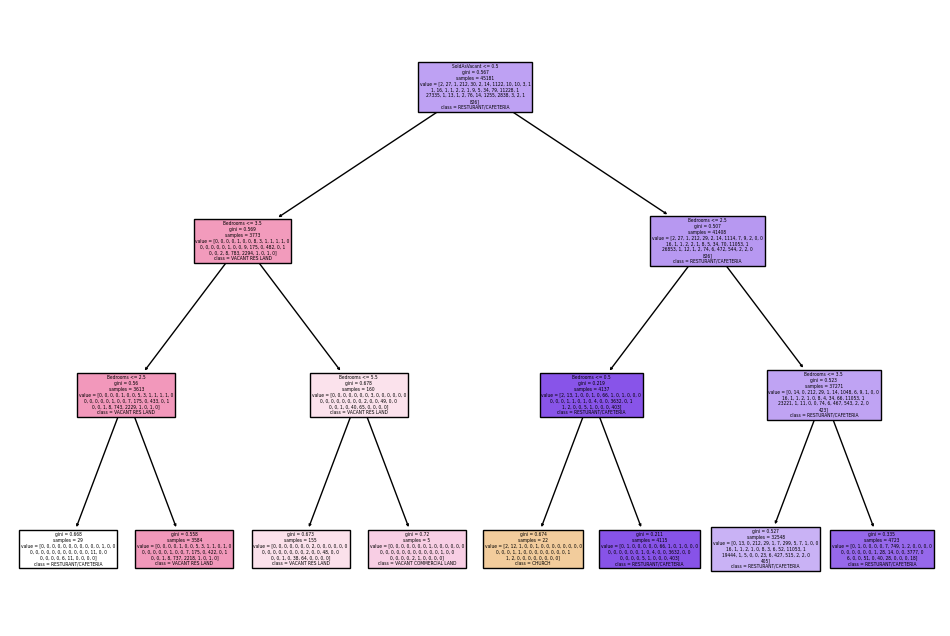

In [49]:
#let's visaualize our data model
clf = DecisionTreeClassifier(max_depth=3, random_state=0)
clf.fit(X_train, y_train)

# Plot the tree
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, 
          feature_names=['SoldAsVacant', 'Bedrooms'], 
          class_names= sorted(y.unique()),
          label = 'all',)
plt.show()

In [50]:
#predicting land use for a propective resident who wants a land sold as vacant and bedroom as 8
predictions = model.predict([[1, 8]])   #sold as vacant is yes, bedrooms is 8
predictions

array(['QUADPLEX'], dtype=object)